Part 2 of the project. To be submitted by **08/11/2024 23:59**

-> Total = **50** pts

<p><img alt="Datasets" src="https://storage.googleapis.com/kaggle-media/competitions/home-credit/home_credit.png" align="left" hspace="10px" vspace="0px"></p>

<h1>Datasets</h1>

In [16]:
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.semi_supervised import LabelPropagation
from itertools import product
from sklearn.semi_supervised import LabelSpreading
import warnings
import matplotlib.pyplot as plt
from tqdm.notebook import tqdm


In [3]:
### 1- Load the dataset "dataset"
### This dataset should be the app_train from the question 6.a of part 1 (Refer to correction if need be). You can include the previous notebook here, but we recommend instead you export it from previous notebook then load it here.
my_dataset = pd.read_csv('app_train_smote.csv')
my_dataset

SK_ID_CURR NAME_CONTRACT_TYPE CODE_GENDER FLAG_OWN_CAR  \
0           100002         Cash loans           M            N   
1           100003         Cash loans           F            N   
2           100004    Revolving loans           M            Y   
3           100006         Cash loans           F            N   
4           100007         Cash loans           M            N   
...            ...                ...         ...          ...   
565367      310260         Cash loans           F            N   
565368      321235         Cash loans           M            Y   
565369      288091         Cash loans           F            N   
565370      379025         Cash loans           M            N   
565371      325208         Cash loans           M            Y   

       FLAG_OWN_REALTY  CNT_CHILDREN  AMT_INCOME_TOTAL    AMT_CREDIT  \
0                    Y             0     202500.000000  4.065975e+05   
1                    N             0     270000.000000  1.293502e+06   
2                    Y             0      67500.000000  1.350000e+05   
3                    Y             0     135000.000000  3.126825e+05   
4                    Y             0     121500.000000  5.130000e+05   
...                ...           ...               ...           ...   
565367               Y             0     112500.000000  2.147468e+05   
565368               Y             0     160461.587250  6.751656e+05   
565369               Y             1      81542.806102  6.223270e+05   
565370               Y             0     207637.760571  3.682290e+05   
565371               Y             0     213295.087999  2.418246e+05   

         AMT_ANNUITY  AMT_GOODS_PRICE  ... FLAG_DOCUMENT_19 FLAG_DOCUMENT_20  \
0       24700.500000     3.510000e+05  ...                0                0   
1       35698.500000     1.129500e+06  ...                0                0   
2        6750.000000     1.350000e+05  ...                0                0   
3       29686.500000     2.970000e+05  ...                0                0   
4       21865.500000     5.130000e+05  ...                0                0   
...              ...              ...  ...              ...              ...   
565367  14720.930370     1.856808e+05  ...                0                0   
565368  44464.010148     6.256152e+05  ...                0                0   
565369  26374.740154     5.090743e+05  ...                0                0   
565370  28297.910763     3.375000e+05  ...                0                0   
565371  23063.080518     2.250000e+05  ...                0                0   

       FLAG_DOCUMENT_21 AMT_REQ_CREDIT_BUREAU_HOUR AMT_REQ_CREDIT_BUREAU_DAY  \
0                     0                   0.000000                  0.000000   
1                     0                   0.000000                  0.000000   
2                     0                   0.000000                  0.000000   
3                     0                   0.006402                  0.007000   
4                     0                   0.000000                  0.000000   
...                 ...                        ...                       ...   
565367                0                   0.000000                  0.000000   
565368                0                   0.001094                  0.001197   
565369                0                   0.003996                  0.004369   
565370                0                   0.002874                  0.003142   
565371                0                   0.000000                  0.000000   

        AMT_REQ_CREDIT_BUREAU_WEEK  AMT_REQ_CREDIT_BUREAU_MON  \
0                         0.000000                   0.000000   
1                         0.000000                   0.000000   
2                         0.000000                   0.000000   
3                         0.034362                   0.267395   
4                         0.000000                   0.000000   
...                            ...    

# A

Processing the provided dataset  (review from past assignment, 7 pts)

**1.** Process the categorical features to be correctly handled. Use the most appropriate methods from sklearn (**2** pts)

**2.** Process the anomalies of the dataset (**1** pt)

**3.** Expand the 5 most important features (justify what 'important' means for you) using PolynomialFeatures (**2** pts). You may need to process missing values before.

**4.** Process the features using the best Scaler (**2** pts)

## A2

Process the anomalies of the dataset

In [4]:
numeric_features = my_dataset.select_dtypes(include=[int, float]).columns
q1 = my_dataset[numeric_features].quantile(0.25)
q3 = my_dataset[numeric_features].quantile(0.75)
iqr = q3 - q1
low = q1 - 1.5 * iqr
high = q3 + 1.5 * iqr

outliers = my_dataset[((my_dataset[numeric_features] < low) | (my_dataset[numeric_features] > high)).any(axis=1)]
outliers.shape

(519088, 72)

In [5]:
my_dataset = my_dataset[~((my_dataset[numeric_features] < low) | (my_dataset[numeric_features] > high)).any(axis=1)]
my_dataset

SK_ID_CURR NAME_CONTRACT_TYPE CODE_GENDER FLAG_OWN_CAR  \
13          100017         Cash loans           M            Y   
63          100075         Cash loans           F            N   
66          100078         Cash loans           F            Y   
93          100111         Cash loans           F            Y   
128         100149         Cash loans           M            Y   
...            ...                ...         ...          ...   
565330      403595         Cash loans           M            N   
565339      438358         Cash loans           M            N   
565340      296870         Cash loans           M            Y   
565357      271356         Cash loans           F            N   
565359      261469         Cash loans           F            N   

       FLAG_OWN_REALTY  CNT_CHILDREN  AMT_INCOME_TOTAL    AMT_CREDIT  \
13                   N             1     225000.000000  9.184680e+05   
63                   N             0     112500.000000  9.594000e+04   
66                   Y             0     180000.000000  1.035000e+06   
93                   N             1     112500.000000  8.625600e+05   
128                  N             0     171000.000000  5.395905e+05   
...                ...           ...               ...           ...   
565330               N             0     269296.861405  5.023415e+05   
565339               Y             0     140875.267195  1.041229e+06   
565340               Y             1     180000.000000  2.869331e+05   
565357               Y             0     232345.582173  9.000000e+05   
565359               Y             0     131704.343802  5.450400e+05   

         AMT_ANNUITY  AMT_GOODS_PRICE  ... FLAG_DOCUMENT_19 FLAG_DOCUMENT_20  \
13      28966.500000     6.975000e+05  ...                0                0   
63      10462.500000     9.000000e+04  ...                0                0   
66      43983.000000     1.035000e+06  ...                0                0   
93      27954.000000     7.200000e+05  ...                0                0   
128     26374.500000     4.455000e+05  ...                0                0   
...              ...              ...  ...              ...              ...   
565330  39817.265388     4.543594e+05  ...                0                0   
565339  33369.095612     9.217254e+05  ...                0                0   
565340  18736.221390     2.317912e+05  ...                0                0   
565357  40056.225563     9.000000e+05  ...                0                0   
565359  25941.217884     4.500000e+05  ...                0                0   

       FLAG_DOCUMENT_21 AMT_REQ_CREDIT_BUREAU_HOUR AMT_REQ_CREDIT_BUREAU_DAY  \
13                    0                        0.0                       0.0   
63                    0                        0.0                       0.0   
66                    0                        0.0                       0.0   
93                    0                        0.0                       0.0   
128                   0                        0.0                       0.0   
...                 ...                        ...                       ...   
565330                0                        0.0                       0.0   
565339                0                        0.0                       0.0   
565340                0                        0.0                       0.0   
565357                0                        0.0                       0.0   
565359                0                        0.0                       0.0   

        AMT_REQ_CREDIT_BUREAU_WEEK  AMT_REQ_CREDIT_BUREAU_MON  \
13                             0.0                   0.000000   
63                             0.0                   0.000000   
66                             0.0                   0.000000   
93                             0.0                   0.000000   
128                            0.0                   0.000000   
...                            ...    

## A3

Expand the 5 most important features (justify what 'important' means for you) using PolynomialFeatures (**2** pts). You may need to process missing values before.


Since we should use `PolynomialFeatures`, we will search for the important features among the numerical features.

In [6]:
feature_importance = (
    RandomForestClassifier(n_estimators=100, random_state=42)
    .fit(
        (numerical_dataset := my_dataset.drop("TARGET", axis=1).select_dtypes("number")),
        my_dataset["TARGET"],
    )
    .feature_importances_
)
most_important_features = numerical_dataset.columns[np.argsort(feature_importance)[:-5:-1]]
most_important_features

Index(['EXT_SOURCE_3', 'EXT_SOURCE_2', 'CNT_FAM_MEMBERS',
       'AMT_REQ_CREDIT_BUREAU_YEAR'],
      dtype='object')

**What 'important' means for me:**
One easy way to define the importance of a feature is to use the feature importance attribute of a model (like `RandomForest` or `XGBoost`). Or we can use the correlation of the feature with the target variable.

In [7]:
from sklearn.preprocessing import PolynomialFeatures


expanded_df = pd.concat(
    [
        my_dataset.drop(columns=most_important_features).reset_index(drop=True),
        pd.DataFrame(
            (pf := PolynomialFeatures(degree=2)).fit_transform(
                numerical_dataset[most_important_features]
            ),
            columns=pf.get_feature_names_out(),
        ),
    ],
    axis=1,
)
expanded_df

SK_ID_CURR NAME_CONTRACT_TYPE CODE_GENDER FLAG_OWN_CAR FLAG_OWN_REALTY  \
0          100017         Cash loans           M            Y               N   
1          100075         Cash loans           F            N               N   
2          100078         Cash loans           F            Y               Y   
3          100111         Cash loans           F            Y               N   
4          100149         Cash loans           M            Y               N   
...           ...                ...         ...          ...             ...   
46279      403595         Cash loans           M            N               N   
46280      438358         Cash loans           M            N               Y   
46281      296870         Cash loans           M            Y               Y   
46282      271356         Cash loans           F            N               Y   
46283      261469         Cash loans           F            N               Y   

       CNT_CHILDREN  AMT_INCOME_TOTAL    AMT_CREDIT   AMT_ANNUITY  \
0                 1     225000.000000  9.184680e+05  28966.500000   
1                 0     112500.000000  9.594000e+04  10462.500000   
2                 0     180000.000000  1.035000e+06  43983.000000   
3                 1     112500.000000  8.625600e+05  27954.000000   
4                 0     171000.000000  5.395905e+05  26374.500000   
...             ...               ...           ...           ...   
46279             0     269296.861405  5.023415e+05  39817.265388   
46280             0     140875.267195  1.041229e+06  33369.095612   
46281             1     180000.000000  2.869331e+05  18736.221390   
46282             0     232345.582173  9.000000e+05  40056.225563   
46283             0     131704.343802  5.450400e+05  25941.217884   

       AMT_GOODS_PRICE  ... EXT_SOURCE_3^2 EXT_SOURCE_3 EXT_SOURCE_2  \
0         6.975000e+05  ...       0.593034                  0.436567   
1         9.000000e+04  ...       0.242123                  0.326996   
2         1.035000e+06  ...       0.184405                  0.222128   
3         7.200000e+05  ...       0.052388                  0.139299   
4         4.455000e+05  ...       0.008466                  0.015133   
...                ...  ...            ...                       ...   
46279     4.543594e+05  ...       0.069590                  0.139280   
46280     9.217254e+05  ...       0.179956                  0.293162   
46281     2.317912e+05  ...       0.025379                  0.049935   
46282     9.000000e+05  ...       0.085616                  0.145546   
46283     4.500000e+05  ...       0.169148                  0.101239   

      EXT_SOURCE_3 CNT_FAM_MEMBERS EXT_SOURCE_3 AMT_REQ_CREDIT_BUREAU_YEAR  \
0                         2.310261                                0.770087   
1                         0.492060                                2.460300   
2                         0.858847                                1.288271   
3                         0.686650                                0.000000   
4                         0.184026                                0.000000   
...                            ...                                     ...   
46279                     0.535841                                0.527597   
46280                     0.645754                                1.272635   
46281                     0.417823                                0.796547   
46282                     0.718596                                0.000000   
46283                     0.822552                                0.521347   

      EXT_SOURCE_2^2  EXT_SOURCE_2 CNT_FAM_MEMBERS  \
0           0.321383                      1.700720   
1           0.441619                      0.664544   
2           0.267569                      1.034541   
3           0.370399                      1.825812   
4           0.027048                      0.328926   
...              ...                           ...   
46279       0.278761     

### Features importance with Random Forest


#B/ Basic Machine Learning (8 pts)

In the following, you will use a split of my_dataset between train and validation. The metrics will be evaluated on the validation set.

**5.** Following the lecture and Random Forest example compare the performance of a Random Forest Classifier and a Logistic Regression Classifier:

**5.1** Scale the features (only for Logistic Regression) (**1** pt)

**5.2** Train a Logistic Regression with C = 0.0001  (**1** pt)

**5.3** Evaluate the performance metrics of the Logistic Regression. Which ones are relevant and which are not? (**2** pts)

**5.4** Train a Random Forest Classifier with 100 estimators and the default max_depth (**2** pts)

**5.5** Evaluate the performance metrics of the Random Forest. Which ones are relevant and which are not? (**2** pts)

# B

# B5

Let's read the labeled dataset (which are the categorical features basically) from `app_train_encoded.csv` file, and combine it with the numerical features from `my_dataset`.

In [8]:
from sklearn.preprocessing import OneHotEncoder


max_class_count = 5
app_train_summarized = my_dataset.copy()
assert app_train_summarized.isna().sum().sum() == 0, "There are missing data in the train dataset"

ordered_cats = ["NAME_EDUCATION_TYPE", "WEEKDAY_APPR_PROCESS_START"]
mapper = {}
vectorized_cols = app_train_summarized.select_dtypes(include="object").columns
new_cat = "Other"

for col in ordered_cats:
    mapper[col] = {
        cat: i for i, cat in enumerate(app_train_summarized[col].unique())
    }
    app_train_summarized[col] = app_train_summarized[col].map(mapper[col])
    if col in vectorized_cols:
        print(f"The column {col} is in the vectorized columns")
        vectorized_cols = vectorized_cols.drop(col)

assert app_train_summarized.isna().sum().sum() == 0, "There are missing data in the train dataset"


encoder = OneHotEncoder(
    drop="first",
    max_categories=max_class_count,
    min_frequency=0.1,
    handle_unknown="infrequent_if_exist",
    sparse_output=False,
).fit(app_train_summarized[vectorized_cols])
app_train_encoded_arr = encoder.transform(app_train_summarized[vectorized_cols])
app_train_encoded = pd.concat(
    [
        (t:=pd.DataFrame(app_train_encoded_arr, columns=encoder.get_feature_names_out())).reset_index(drop=True),
        app_train_summarized.select_dtypes("number").reset_index(drop=True),
        app_train_summarized[ordered_cats].reset_index(drop=True),
    ],
    axis=1,
)
# Remove constant columns
app_train_encoded = app_train_encoded.loc[:, (app_train_encoded != app_train_encoded.iloc[0]).any()]
app_train_encoded

The column NAME_EDUCATION_TYPE is in the vectorized columns
The column WEEKDAY_APPR_PROCESS_START is in the vectorized columns


NAME_CONTRACT_TYPE_infrequent_sklearn  CODE_GENDER_M  FLAG_OWN_CAR_Y  \
0                                        0.0            1.0             1.0   
1                                        0.0            0.0             0.0   
2                                        0.0            0.0             1.0   
3                                        0.0            0.0             1.0   
4                                        0.0            1.0             1.0   
...                                      ...            ...             ...   
46279                                    0.0            1.0             0.0   
46280                                    0.0            1.0             0.0   
46281                                    0.0            1.0             1.0   
46282                                    0.0            0.0             0.0   
46283                                    0.0            0.0             0.0   

       FLAG_OWN_REALTY_Y  NAME_TYPE_SUITE_infrequent_sklearn  \
0                    0.0                                 0.0   
1                    0.0                                 1.0   
2                    1.0                                 0.0   
3                    0.0                                 0.0   
4                    0.0                                 1.0   
...                  ...                                 ...   
46279                0.0                                 0.0   
46280                1.0                                 0.0   
46281                1.0                                 0.0   
46282                1.0                                 0.0   
46283                1.0                                 0.0   

       NAME_INCOME_TYPE_Working  NAME_INCOME_TYPE_infrequent_sklearn  \
0                           1.0                                  0.0   
1                           1.0                                  0.0   
2                           0.0                                  1.0   
3                           0.0                                  0.0   
4                           1.0                                  0.0   
...                         ...                                  ...   
46279                       1.0                                  0.0   
46280                       1.0                                  0.0   
46281                       1.0                                  0.0   
46282                       1.0                                  0.0   
46283                       1.0                                  0.0   

       NAME_FAMILY_STATUS_Single / not married  \
0                                          0.0   
1                                          1.0   
2                                          0.0   
3                                          0.0   
4                                          0.0   
...                                        ...   
46279                                      0.0   
46280                                      0.0   
46281                                      0.0   
46282                                      0.0   
46283                                      1.0   

       NAME_FAMILY_STATUS_infrequent_sklearn  \
0                                        0.0   
1                                        0.0   
2                                        0.0   
3                                        0.0   
4                                        0.0   
...                                      ...   
46279                                    0.0   
46280                                    0.0   
46281                                    0.0   
46282                                    0.0   
46283                                    0.0   

       NAME_HOUSING_TYPE_infrequent_sklearn  ...  EXT_SOURCE_3  \
0                                       0.0  ...      0.770087   
1                                       0.0  ...      0.492060   
2                                       0.0  ...

## Train Validation Split

In [9]:
sampled_df = app_train_encoded.sample(frac=0.3, random_state=1376)
print(sampled_df.shape)
x_train, x_valid, y_train, y_valid = train_test_split(
    sampled_df.drop(columns="TARGET"),
    sampled_df["TARGET"],
    test_size=0.2,
    random_state=1376,
)

assert x_train.shape[0] == y_train.shape[0], "The number of rows in x_train and y_train should be the same"
assert x_valid.shape[0] == y_valid.shape[0], "The number of rows in x_valid and y_valid should be the same"
assert x_train.shape[1] == x_valid.shape[1], "The number of columns in x_train and x_valid should be the same"


x_train

(13885, 38)


NAME_CONTRACT_TYPE_infrequent_sklearn  CODE_GENDER_M  FLAG_OWN_CAR_Y  \
42900                                    0.0            0.0             0.0   
21383                                    0.0            0.0             1.0   
17792                                    0.0            1.0             0.0   
28066                                    0.0            0.0             1.0   
2532                                     0.0            1.0             1.0   
...                                      ...            ...             ...   
2319                                     0.0            0.0             0.0   
30368                                    0.0            0.0             0.0   
29932                                    0.0            1.0             0.0   
23214                                    0.0            0.0             0.0   
25228                                    0.0            1.0             1.0   

       FLAG_OWN_REALTY_Y  NAME_TYPE_SUITE_infrequent_sklearn  \
42900                1.0                                 0.0   
21383                1.0                                 0.0   
17792                1.0                                 0.0   
28066                1.0                                 0.0   
2532                 0.0                                 0.0   
...                  ...                                 ...   
2319                 1.0                                 0.0   
30368                1.0                                 0.0   
29932                1.0                                 0.0   
23214                1.0                                 0.0   
25228                1.0                                 0.0   

       NAME_INCOME_TYPE_Working  NAME_INCOME_TYPE_infrequent_sklearn  \
42900                       1.0                                  0.0   
21383                       1.0                                  0.0   
17792                       0.0                                  0.0   
28066                       0.0                                  0.0   
2532                        1.0                                  0.0   
...                         ...                                  ...   
2319                        1.0                                  0.0   
30368                       1.0                                  0.0   
29932                       1.0                                  0.0   
23214                       1.0                                  0.0   
25228                       1.0                                  0.0   

       NAME_FAMILY_STATUS_Single / not married  \
42900                                      0.0   
21383                                      0.0   
17792                                      0.0   
28066                                      0.0   
2532                                       1.0   
...                                        ...   
2319                                       1.0   
30368                                      0.0   
29932                                      0.0   
23214                                      0.0   
25228                                      0.0   

       NAME_FAMILY_STATUS_infrequent_sklearn  \
42900                                    0.0   
21383                                    0.0   
17792                                    0.0   
28066                                    0.0   
2532                                     0.0   
...                                      ...   
2319                                     0.0   
30368                                    0.0   
29932                                    0.0   
23214                                    1.0   
25228                                    0.0   

       NAME_HOUSING_TYPE_infrequent_sklearn  ...  EXT_SOURCE_2  EXT_SOURCE_3  \
42900                                   0.0  ...      0.181117      0.728392   
21383                                   0.0  ...      0.487140      0.556369   
17792 

In [11]:
from sklearn.linear_model import LogisticRegression

rf_model = RandomForestClassifier(n_estimators=100, random_state=1376).fit(x_train, y_train)
print("Random Forest model score: ", rf_model.score(x_valid, y_valid))

x_train_norm = (x_train - x_train.mean()) / x_train.std()
x_valid_norm = (x_valid - x_train.mean()) / x_train.std()
# note: we are using the mean and std of the training set to normalize the validation set to avoid data leakage
lr_model = LogisticRegression(C=0.0001, random_state=1376).fit(x_train_norm, y_train)
print("Logistic Regression model score: ", lr_model.score(x_valid_norm, y_valid))

Random Forest model score:  0.9175369103348938
Logistic Regression model score:  0.7457688152682751


In [12]:
# **5.4** Train a Random Forest Classifier with 100 estimators and the default max_depth (**2** pts)

rf_model = RandomForestClassifier(n_estimators=100, random_state=1376).fit(x_train, y_train)

In [13]:
from matplotlib import style
from matplotlib.pylab import f
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score
import rich

y_pred_rf = rf_model.predict(x_valid)
y_pred_rf_proba = rf_model.predict_proba(x_valid)[:, 1]

y_pred_lr = lr_model.predict(x_valid_norm)
y_pred_lr_proba = lr_model.predict_proba(x_valid_norm)[:, 1]


console = rich.get_console()
table = rich.table.Table(title="Model Performance")
table.add_column("Model")
table.add_column("Accuracy")
table.add_column("Precision")
table.add_column("Recall")
table.add_column("F1")
table.add_column("AUC")
table.add_row(
    "Random Forest",
    f"{accuracy_score(y_valid, y_pred_rf):2.3f}",
    f"{precision_score(y_valid, y_pred_rf):2.3f}",
    f"{recall_score(y_valid, y_pred_rf):2.3f}",
    f"{f1_score(y_valid, y_pred_rf):2.3f}",
    f"{roc_auc_score(y_valid, y_pred_rf_proba):2.3f}",
    style="bold green",
)
table.add_row(
    "Logistic Regression",
    f"{accuracy_score(y_valid, y_pred_lr):2.3f}",
    f"{precision_score(y_valid, y_pred_lr):2.3f}",
    f"{recall_score(y_valid, y_pred_lr):2.3f}",
    f"{f1_score(y_valid, y_pred_lr):2.3f}",
    f"{roc_auc_score(y_valid, y_pred_lr_proba):2.3f}",
    style="bold blue",
)

console.print(table)

                           Model Performance                           
┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━┳━━━━━━━━━━━┳━━━━━━━━┳━━━━━━━┳━━━━━━━┓
┃ Model               ┃ Accuracy ┃ Precision ┃ Recall ┃ F1    ┃ AUC   ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━╇━━━━━━━━━━━╇━━━━━━━━╇━━━━━━━╇━━━━━━━┩
│ Random Forest       │ 0.918    │ 0.933     │ 0.938  │ 0.936 │ 0.970 │
│ Logistic Regression │ 0.746    │ 0.719     │ 0.988  │ 0.832 │ 0.897 │
└─────────────────────┴──────────┴───────────┴────────┴───────┴───────┘

#C/ Machine Learning Hyper-parameter optimization (10 pts)

**6.** Use a grid-search to find a better combination C value and "class_weight" value for the previous Logistic Regression Model (you can do a search manually with a loop or use Scikit-learn grid search features) (**2** pts)

**7.1** Use a random search to find a better combination C value and "class_weight" value for the previous Logistic Regression Model.  (you can do a search manually with a loop or use Scikit-learn grid search features) (**2** pts)

**7.2** How many random iterations are needed to find performances as good as your previous grid search? (**2** pts)


**8.1** Plot how the performance metric selected in 5.5 changes when changing the number of estimators? When changing the depth of the trees (max 10)? (**2** pts)

**8.2** What are the optimal values of these parameters (optimized together)? (**2** pts)

In [14]:
# **6.** Use a grid-search to find a better combination C value and "class_weight" value for the previous Logistic Regression Model (you can do a search manually with a loop or use Scikit-learn grid search features) (**2** pts)

grid_search_params = {}
for c in [0.001, 0.01, 0.1, 1, 10, 100]:
    for class_weight in [None, "balanced"]:
        grid_search_params[(c, class_weight)] = LogisticRegression(C=c, class_weight=class_weight, random_state=1376).fit(x_train_norm, y_train).score(x_valid_norm, y_valid)

best_params = max(grid_search_params, key=grid_search_params.get)
print(f"The best parameters are: {best_params} with a score of {grid_search_params[best_params]}")
      

The best parameters are: (10, 'balanced') with a score of 0.8476773496579042


In [15]:
# **7.1** Use a random search to find a better combination C value and "class_weight" value for the previous Logistic Regression Model.  (you can do a search manually with a loop or use Scikit-learn grid search features) (**2** pts)

import random


random_search_params = {}
for _ in range(100):
    c = np.random.uniform(0.001, 100, 1)[0]
    class_weight = random.choice([None, "balanced"])
    random_search_params[(c, class_weight)] = LogisticRegression(C=c, class_weight=class_weight, random_state=1376).fit(x_train_norm, y_train).score(x_valid_norm, y_valid)

best_params = max(random_search_params, key=random_search_params.get)
print(f"The best parameters are: {best_params} with a score of {random_search_params[best_params]}")

The best parameters are: (10.737998050459177, 'balanced') with a score of 0.8476773496579042


**7.2** How many random iterations are needed to find performances as good as your previous grid search? (**2** pts)
> Almost 100 or 50 iterations are enough to find the best parameters.

In [ ]:
# **8.1** Plot how the performance metric selected in 5.5 changes when changing the number of estimators? When changing the depth of the trees (max 10)? (**2** pts)


n_estimators = [10, 100, 300, 500]
max_depth = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]
scores = np.zeros((len(n_estimators), len(max_depth)))

for ni, n in enumerate(tqdm(n_estimators)):
    for di, d in enumerate(tqdm(max_depth, leave=False, desc=f"n_estimators={n}")):
        model = RandomForestClassifier(n_estimators=n, max_depth=d, random_state=1376).fit(x_train, y_train)
        scores[ni, di] = model.score(x_valid, y_valid)


  0%|          | 0/4 [00:00<?, ?it/s]

n_estimators=10:   0%|          | 0/10 [00:00<?, ?it/s]

n_estimators=100:   0%|          | 0/10 [00:00<?, ?it/s]

n_estimators=300:   0%|          | 0/10 [00:00<?, ?it/s]

n_estimators=500:   0%|          | 0/10 [00:00<?, ?it/s]

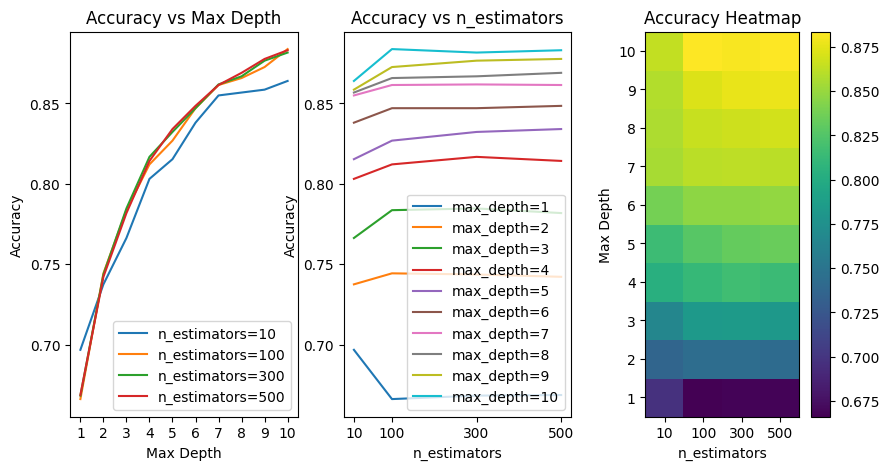

In [17]:

plt.figure(figsize=(10, 5))
plt.subplot(1, 3, 1)
for i, n in enumerate(n_estimators):
    plt.plot(max_depth, scores[i, :], label=f"n_estimators={n}")
plt.xticks(max_depth)
plt.xlabel("Max Depth")
plt.ylabel("Accuracy")
plt.title("Accuracy vs Max Depth")
plt.legend()

plt.subplot(1, 3, 2)
for i, d in enumerate(max_depth):
    plt.plot(n_estimators, scores[:, i], label=f"max_depth={d}")
plt.xticks(n_estimators)
plt.xlabel("n_estimators")
plt.ylabel("Accuracy")
plt.title("Accuracy vs n_estimators")
plt.legend()

plt.subplot(1, 3, 3)
plt.imshow(scores.T, cmap="viridis", origin="lower")
plt.yticks(np.arange(len(max_depth)), max_depth)
plt.xticks(np.arange(len(n_estimators)), n_estimators)
plt.colorbar()
plt.ylabel("Max Depth")
plt.xlabel("n_estimators")
plt.title("Accuracy Heatmap")
plt.show()

    

In [18]:
# **8.2** What are the optimal values of these parameters (optimized together)? (**2** pts)

arg_max_n_estimators, arg_max_max_depth = np.unravel_index(scores.argmax(), scores.shape)
print(f"The optimal values are n_estimators={n_estimators[arg_max_n_estimators]} and max_depth={max_depth[arg_max_max_depth]} with a score of {scores[arg_max_n_estimators, arg_max_max_depth]}")

The optimal values are n_estimators=100 and max_depth=10 with a score of 0.8836874324810947


#D/ Post Machine Learning Feature inteprepretation (5 pts)

**9.1** Get the features importance of the Optimal Random Forest classifier (obtained in 8) (**2** pts)

**9.2** Are they the features that are the most correlated with the target? (**1** pt)

**10.** Compare the tree structure obtained with visualization (using export_graphviz for instance) of the first tree of your random forest and the last tree of your random forest. How can you explain the differences?  (**2** pts)


<Axes: title={'center': 'Feature Importance'}, ylabel='Importance'>

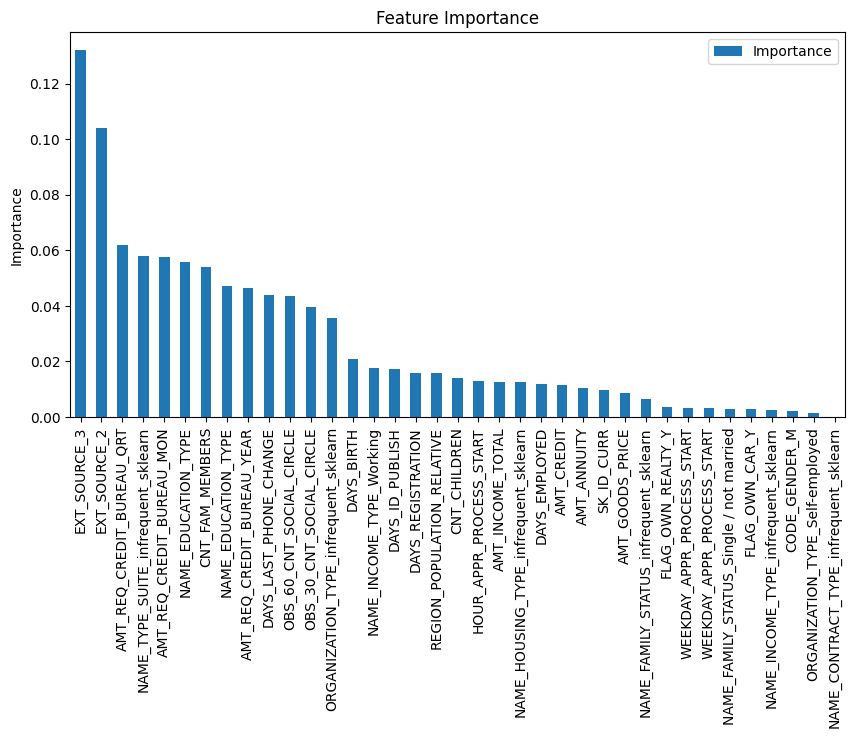

In [19]:
# **9.1** Get the features importance of the Optimal Random Forest classifier (obtained in 8) (**2** pts)

best_rf_model = RandomForestClassifier(
    n_estimators=n_estimators[arg_max_n_estimators],
    max_depth=max_depth[arg_max_max_depth],
    random_state=1376,
).fit(x_train, y_train)
feature_importance = best_rf_model.feature_importances_
feature_importance_df = pd.DataFrame(
    feature_importance,
    index=x_train.columns,
    columns=["Importance"],
).sort_values("Importance", ascending=False)
feature_importance_df.plot(kind="bar", figsize=(10, 5), title="Feature Importance", ylabel="Importance")


<Axes: title={'center': 'Feature Importance vs Correlation'}, ylabel='Importance/Correlation'>

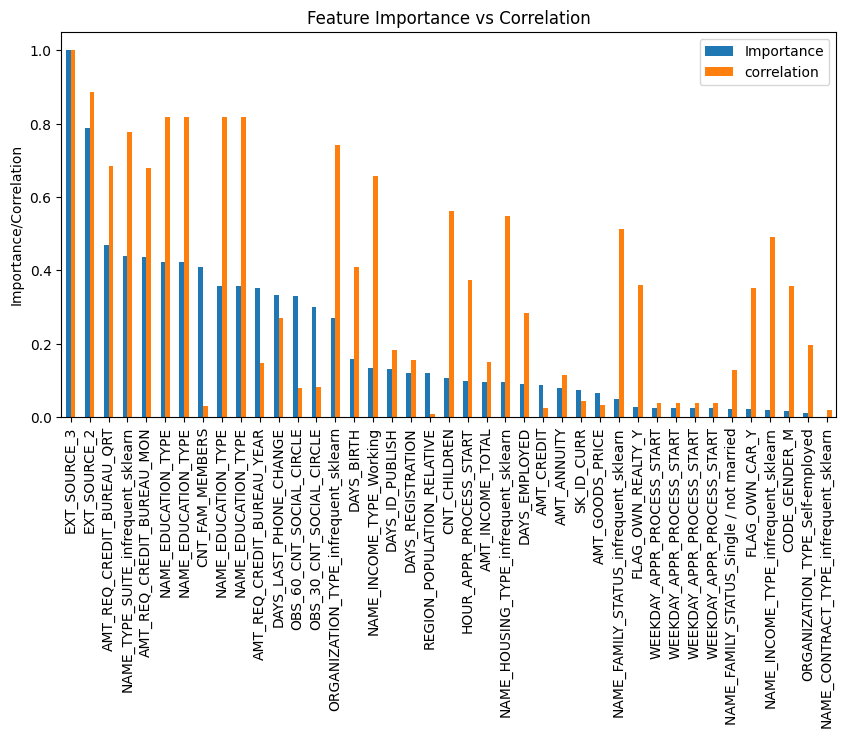

In [20]:
# **9.2** Are they the features that are the most correlated with the target? (**1** pt)

correlation = app_train_encoded.corr()["TARGET"].abs().sort_values(ascending=False).to_frame("correlation").drop("TARGET")
t = feature_importance_df.join(correlation, how="inner")
t = t / t.max()
t.plot(kind="bar", figsize=(10, 5), title="Feature Importance vs Correlation", ylabel="Importance/Correlation")

In [30]:
# **10.** Compare the tree structure obtained with visualization (using export_graphviz for instance) of the first tree of your random forest and the last tree of your random forest. How can you explain the differences?  (**2** pts)

from sklearn.tree import export_graphviz
import pydot
from IPython.display import Image

for i, tree in enumerate(best_rf_model.estimators_):
    if i == 0:
        export_graphviz(
            tree,
            out_file="tree_first.dot",
            feature_names=x_train.columns,
            class_names=["0", "1"],
            rounded=True,
            filled=True,
        )
        (graph := pydot.graph_from_dot_file("tree_first.dot"))[0].write_png("tree_first.png")
        break

for i, tree in enumerate(best_rf_model.estimators_):
    if i == len(best_rf_model.estimators_) - 1:
        export_graphviz(
            tree,
            out_file="tree_last.dot",
            feature_names=x_train.columns,
            class_names=["0", "1"],
            rounded=True,
            filled=True,
        )
        (graph := pydot.graph_from_dot_file("tree_last.dot"))[0].write_png("tree_last.png")
        break

Image("tree_first.png")

NameError: name 'best_rf_model' is not defined

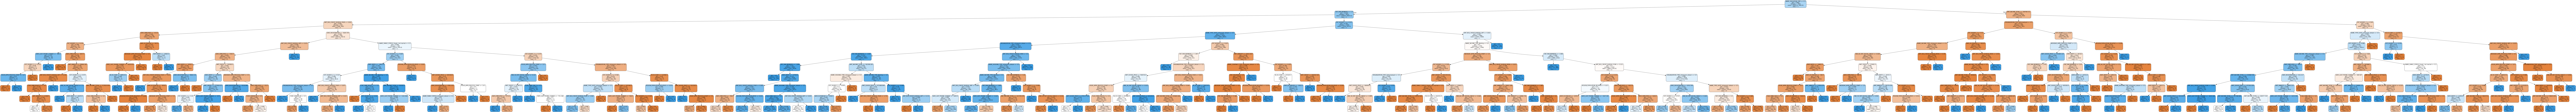

In [22]:
Image("tree_last.png")

#E/ Evasion attacks (12pts)

**11.** Implement the Algorithm 2 from the research paper in https://arxiv.org/pdf/1605.07277.pdf

Section 6.5 of the research paper describes the intuition of the algorithm and the different parameters (**5** pts).

PS: the whole paper gives you a good understand of adversarial attacks and is a recommended reading

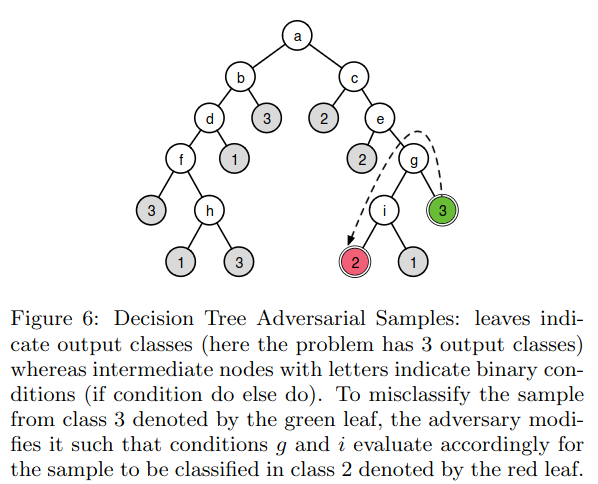

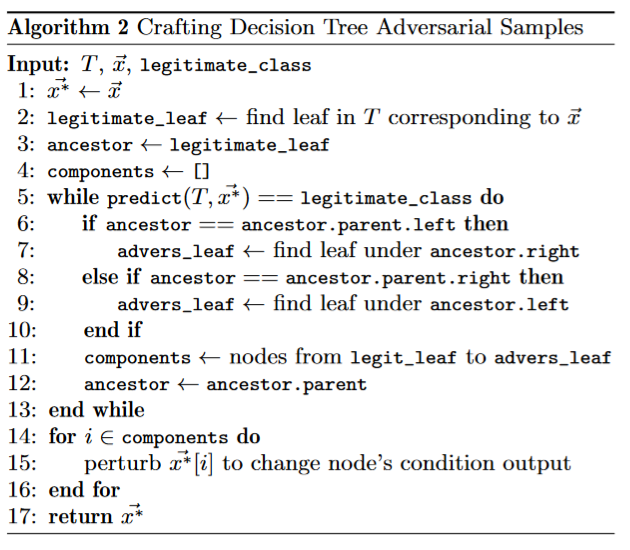

In [59]:
import numpy as np
from sklearn.tree import DecisionTreeClassifier

# Function to find the leaf node corresponding to a given input ~x
def find_leaf(tree, x):
    node = 0  # Start at the root node
    while tree.tree_.children_left[node] != -1:  # Continue until a leaf is reached
        feature = tree.tree_.feature[node]
        threshold = tree.tree_.threshold[node]
        if x[feature] <= threshold:
            node = tree.tree_.children_left[node]
        else:
            node = tree.tree_.children_right[node]
    return node

# Function to trace the path from the leaf to the root and return components
def trace_path(tree, start_node, end_node):
    path = []
    node = start_node
    while node != end_node and node != -1:
        path.append(node)
        parent_node = (node - 1) // 2
        node = parent_node
    path.append(end_node)
    return path

def algorithm(tree: DecisionTreeClassifier, x, legitimate_class):
    x_star = np.copy(x)
    legitimate_leaf = find_leaf(tree, x)
    ancestor = legitimate_leaf
    components = []

    while tree.predict([x_star])[0] == legitimate_class:
        if ancestor == 0:  # Ensure termination when the root is reached
            break
        parent_node = (ancestor - 1) // 2
        if ancestor == tree.tree_.children_left[parent_node]:
            advers_leaf = find_leaf(tree, x)  # Find an adversarial leaf under the right child
        else:
            advers_leaf = find_leaf(tree, x)  # Find an adversarial leaf under the left child

        components.extend(trace_path(tree, legitimate_leaf, advers_leaf))
        ancestor = parent_node

    # Perturb ~x* to change node's condition output
    for i in components:
        feature = tree.tree_.feature[i]
        # if feature == -2:  # Skip if the node is not a split node
        #     continue
        threshold = tree.tree_.threshold[i]
        print(f"Feature: {feature}, Threshold: {threshold}, Value: {x_star[feature]}")
        # x_star[feature] += np.sign(threshold - x_star[feature]) * 0.3
        x_star[feature] = threshold + 0.1

    return x_star

# Sample usage
X_train_tmp = np.random.randint(0, 10, (40, 5)).astype(float)
y_train_tmp = np.random.randint(0, 2, 40)

clf = DecisionTreeClassifier(max_depth=3)
clf.fit(X_train_tmp, y_train_tmp)

x_legit = np.array([2, 3, 4, 5, 6]).astype(float)
legitimate_class = clf.predict([x_legit])[0]
adversarial_sample = algorithm(clf, x_legit, legitimate_class)

print("Original sample:", x_legit)
print("Adversarial sample:", adversarial_sample)

clf.predict([x_legit]), clf.predict([adversarial_sample])

Feature: -2, Threshold: -2.0, Value: 5.0
Feature: -2, Threshold: -2.0, Value: -1.9
Original sample: [2. 3. 4. 5. 6.]
Adversarial sample: [ 2.   3.   4.  -1.9  6. ]


(array([1]), array([1]))

In [61]:
clf.tree_.threshold

array([ 6.5,  7.5,  0.5, -2. , -2. , -2. ,  0.5, -2. ,  5. , -2. , -2. ])

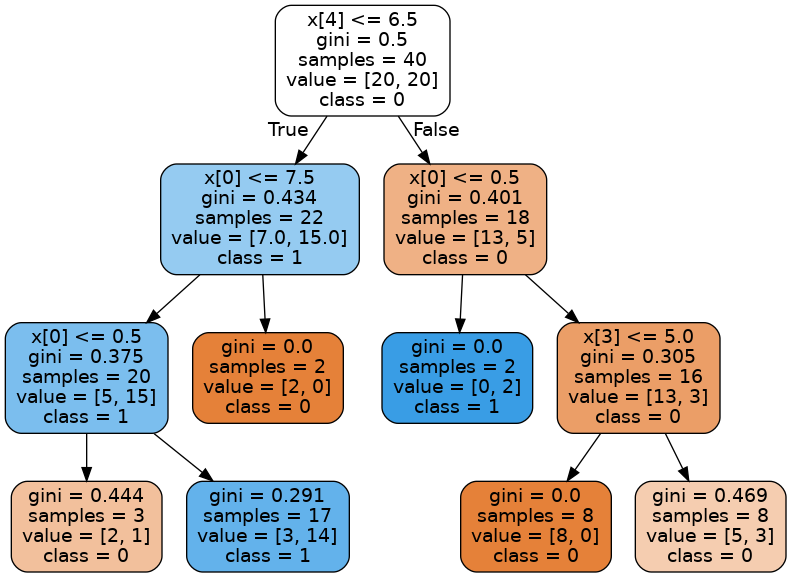

In [60]:
export_graphviz(
            clf,
            out_file="tree_first.dot",
            # feature_names=X_train_tmp.shape[1]
            class_names=["0", "1"],
            rounded=True,
            filled=True,
        )
pydot.graph_from_dot_file("tree_first.dot")[0].write_png("tree_first.png")
Image("tree_first.png")

**12.1** Either using the attack you implemented in question 11. or using the library Adversarial Robustness Toolbox (https://github.com/Trusted-AI/adversarial-robustness-toolbox/), generate a Decision Tree Attack on the validation set on the first tree of the random forest (cf question 10). (**5** pts).

## Random Forest Attack

In [24]:
from sklearn.ensemble import RandomForestClassifier
from art.attacks.evasion import HopSkipJump
from art.estimators.classification import SklearnClassifier
import numpy as np

# Create synthetic training data
X_train_tmp = np.array([[0, 0], [1, 1], [0, 1], [1, 0]])
y_train_tmp = np.array([0, 1, 1, 0])

# Train a random forest classifier
model = RandomForestClassifier(n_estimators=10)
model.fit(X_train_tmp, y_train_tmp)

# Wrap the model with ART's SklearnClassifier
classifier = SklearnClassifier(model=model)

# Create an instance of the HopSkipJump attack
attack = HopSkipJump(classifier=classifier)

# Generate adversarial examples
X_test = np.array([[0.1, 0.1], [0.9, 0.9]])  # Test data
X_adv = attack.generate(x=X_test)

# Check predictions on adversarial examples
print("Original Test Inputs:")
print(X_test)
print("\nAdversarial Test Inputs:")
print(X_adv)
print("\nModel predictions on adversarial examples:")
print(model.predict(X_adv))
model.predict(X_test)


/home/kasra/py_venvs/py311_ml/lib/python3.11/site-packages/art/estimators/certification/__init__.py:30: UserWarning: PyTorch not found. Not importing DeepZ or Interval Bound Propagation functionality
  warnings.warn("PyTorch not found. Not importing DeepZ or Interval Bound Propagation functionality")


HopSkipJump:   0%|          | 0/2 [00:00<?, ?it/s]

Original Test Inputs:
[[0.1 0.1]
 [0.9 0.9]]

Adversarial Test Inputs:
[[0.10557632 0.55751514]
 [0.89690745 0.44161752]]

Model predictions on adversarial examples:
[1 0]


array([0, 1])

In [ ]:


x_valid_small = x_valid.sample(100)
y_valid_small = y_valid.loc[x_valid_small.index]

classifier = SklearnClassifier(model=best_rf_model)
attack = HopSkipJump(classifier=classifier)
with warnings.catch_warnings():
    warnings.simplefilter("ignore")
    x_adv_arr = attack.generate(x=x_valid_small.values)
x_adv = pd.DataFrame(x_adv_arr, columns=x_valid_small.columns)

HopSkipJump:   0%|          | 0/100 [00:00<?, ?it/s]

In [26]:
print("Model results on adversarial examples:")
print(best_rf_model.score(x_adv, y_valid_small))
print("Model predictions on original examples:")
print(best_rf_model.score(x_valid_small, y_valid_small))

Model results on adversarial examples:
0.58
Model predictions on original examples:
0.87



**12.2** Evaluate the AUC on the generated adversarial examples. It should be lower than the AUC obtained on question 8.2. (**2** pts).

In [27]:
print("AUC on original examples:")
print(roc_auc_score(y_valid_small, best_rf_model.predict_proba(x_valid_small)[:, 1]))
print("AUC on adversarial examples:")
print(roc_auc_score(y_valid_small, best_rf_model.predict_proba(x_adv)[:, 1]))


AUC on original examples:
0.9499793303017776
AUC on adversarial examples:
0.9049193881769326


It is recommended to optimize the hyper parameters of each of the techniques

#F/ Semi-supervised Learning (8pts)

**13.1** Using LabelPropagation from sklearn library, fit the labels using the validation set and infer the labels of the training set (**3** pts)

In [19]:


param_grid = {
    'kernel': ['rbf', 'knn'],
    'gamma': [0.01, 0.1, 1, 10, 100],
    'n_neighbors': [5, 7, 10, 15]
}

scores = []
params_list = list(product(*param_grid.values()))
for params in tqdm(params_list):
    model = LabelPropagation(**dict(zip(param_grid.keys(), params)))
    with warnings.catch_warnings():
        warnings.simplefilter("ignore")
        model.fit(x_train, y_train)
        scores.append(model.score(x_valid, y_valid))


best_params = params_list[np.argmax(scores)]
best_lbl_prop_model = LabelPropagation(**dict(zip(param_grid.keys(), best_params)))
best_lbl_prop_model.fit(x_train, y_train)
print(f"The best parameters are: {best_params} with a score of {best_lbl_prop_model.score(x_valid, y_valid)}")

  0%|          | 0/40 [00:00<?, ?it/s]

The best parameters are: ('knn', 0.01, 5) with a score of 0.6928339935181851


**13.2** Using LabelSpreading from sklearn library, fit the labels using the validation set and infer the labels of the training set (**3** pts)

In [17]:

param_grid = {
    'kernel': ['rbf', 'knn'],
    'gamma': [0.01, 0.1, 1, 10, 100],
    'n_neighbors': [5, 7, 10, 15]
}

scores = []
params_list = list(product(*param_grid.values()))
for params in tqdm(params_list):
    model = LabelSpreading(**dict(zip(param_grid.keys(), params)))
    with warnings.catch_warnings():
        warnings.simplefilter("ignore")
        model.fit(x_train, y_train)
        scores.append(model.score(x_valid, y_valid))


best_params = params_list[np.argmax(scores)]
best_lbl_spread_model = LabelSpreading(**dict(zip(param_grid.keys(), best_params)))
best_lbl_spread_model.fit(x_train, y_train)
print(f"The best parameters are: {best_params} with a score of {best_lbl_spread_model.score(x_valid, y_valid)}")

  0%|          | 0/40 [00:00<?, ?it/s]

The best parameters are: ('knn', 0.01, 5) with a score of 0.6939142960028808


**14.** Compare the silhouette performance metrics and the accuracy of the labels of the clusters obtained using each technique. (**2** pts)

In [21]:
from sklearn.metrics import silhouette_score

# Calculate silhouette score for Label Propagation
lbl_prop_labels = best_lbl_prop_model.predict(x_valid)
silhouette_score_lbl_prop = silhouette_score(x_valid.values, lbl_prop_labels)

# Calculate silhouette score for Label Spreading
lbl_sprd_labels = best_lbl_spread_model.predict(x_valid)
silhouette_score_lbl_sprd = silhouette_score(x_valid.values, lbl_sprd_labels)

print(f"Silhouette Score for Label Propagation: {silhouette_score_lbl_prop}")
print(f"Silhouette Score for Label Spreading: {silhouette_score_lbl_sprd}")

print("Label Propagation" if silhouette_score_lbl_prop > silhouette_score_lbl_sprd else "Label Spreading" + " has a better silhouette score")

Silhouette Score for Label Propagation: 0.033698220053183674
Silhouette Score for Label Spreading: 0.03720937689322502
Label Spreading has a better silhouette score
